In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [2]:
a = 3; b = 3;

##### Сначала "портим" один раз

m = 10
a LSE = 2.3019445092518858 a Theil = 2.4741241442298545
b LSE = 3.341177833303473 b Theil = 2.83239228795854
sigma LSE = RSS / m =  2.0198890199186463
sigma Theil = RSS / m =  1.7659937306644022


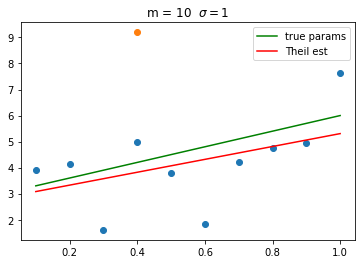

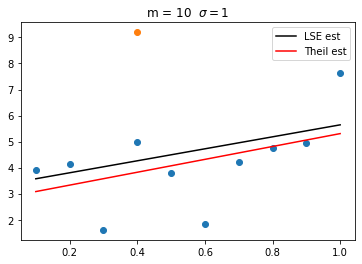

m = 20
a LSE = 2.3168205286111387 a Theil = 2.6099239435662716
b LSE = 3.2242901791136163 b Theil = 2.7678377466276047
sigma LSE = RSS / m =  0.9396428479758254
sigma Theil = RSS / m =  0.9397047122272001


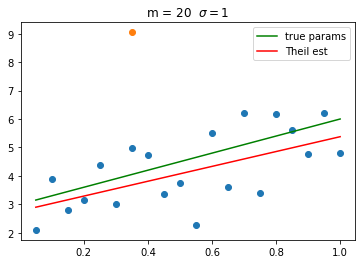

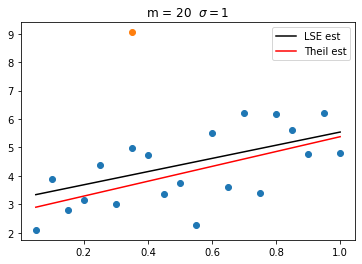

m = 50
a LSE = 3.4103025079339266 a Theil = 3.675032224372134
b LSE = 2.86159060949989 b Theil = 2.5649122966420315
sigma LSE = RSS / m =  0.8633887513204452
sigma Theil = RSS / m =  0.8692323169681029


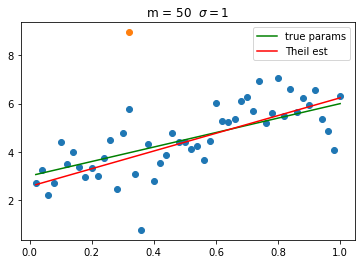

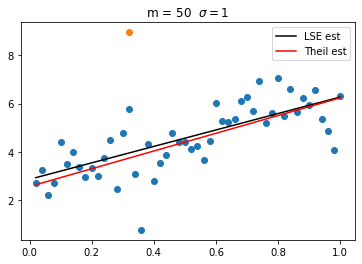

In [7]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + my_norm(0, 1).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys_corrupt)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys_corrupt, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ', sum([(ys[i] - LSEa * xs[i] - LSEb) ** 2 for i in range(1, m0)]) / m0)
    print('sigma Theil = RSS / m = ', sum([(ys[i] - Theila * xs[i] - Theilb) ** 2 for i in range(1, m0)]) / m0)
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys_corrupt[t])
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys_corrupt[t])
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

m = 10
a LSE = 2.897779225621174 a Theil = 2.8765018306340147
b LSE = 3.177724330091774 b Theil = 3.2367315739578455
sigma LSE = RSS / m =  0.06567646111370794
sigma Theil = RSS / m =  0.07528984063722947


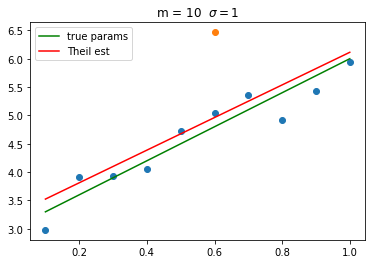

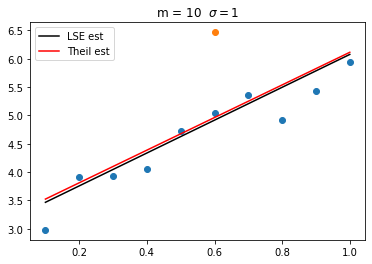

m = 20
a LSE = 2.960094645443874 a Theil = 2.8870533821656528
b LSE = 3.0376363290110637 b Theil = 2.811471294043522
sigma LSE = RSS / m =  0.11741749222565463
sigma Theil = RSS / m =  0.16956254244831379


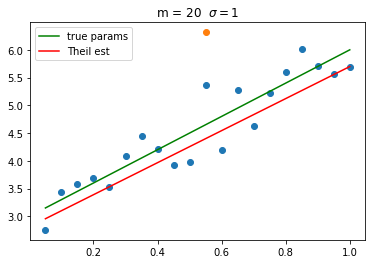

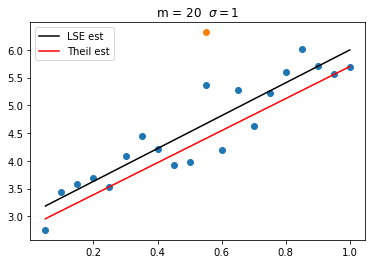

m = 50
a LSE = 3.134563568358642 a Theil = 3.1692915668244233
b LSE = 2.9710252510584683 b Theil = 2.8523381908004444
sigma LSE = RSS / m =  0.14410110213911284
sigma Theil = RSS / m =  0.1469118936318106


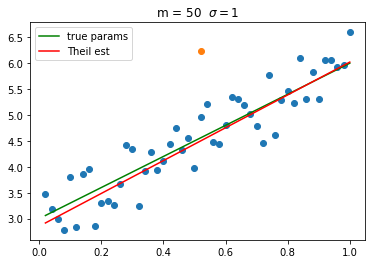

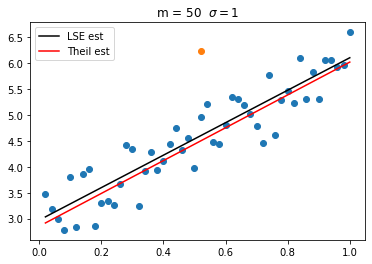

In [8]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + stat.norm(0, a / 9).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5 * a / 9
    
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys_corrupt)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys_corrupt, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ', sum([(ys[i] - LSEa * xs[i] - LSEb) ** 2 for i in range(1, m0)]) / m0)
    print('sigma Theil = RSS / m = ', sum([(ys[i] - Theila * xs[i] - Theilb) ** 2 for i in range(1, m0)]) / m0)
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys_corrupt[t])
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.scatter(xs[t], ys_corrupt[t])
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

###### Теперь "портим" в разные стороны

m = 10
a LSE = 6.587849848137406 a Theil = 4.846262652961363
b LSE = 1.0753240655976222 b Theil = 1.852855220268181
sigma LSE = RSS / m =  1.1722156593386377
sigma Theil = RSS / m =  0.6810447638260421


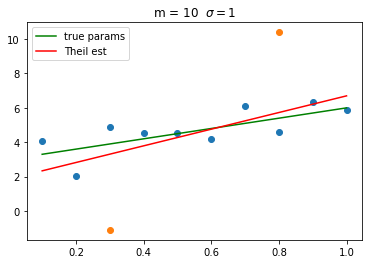

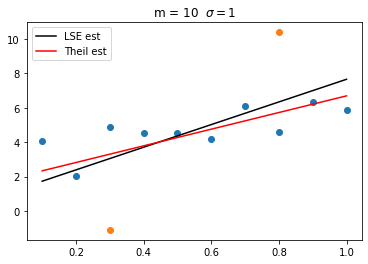

m = 20
a LSE = 1.8417193946391086 a Theil = 2.5459364101141047
b LSE = 3.7990713323682392 b Theil = 3.2971726390185414
sigma LSE = RSS / m =  0.9741901387725129
sigma Theil = RSS / m =  1.0194331306526494


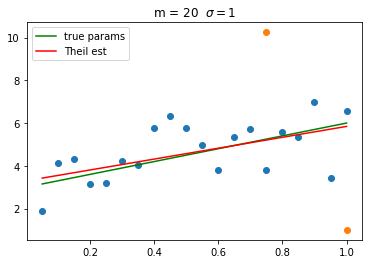

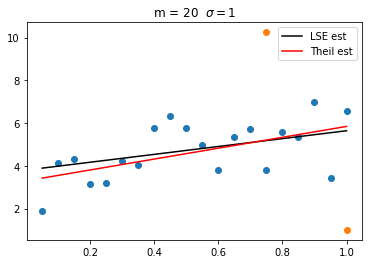

m = 50
a LSE = 2.717637837769801 a Theil = 2.645511800429446
b LSE = 3.1637071423247725 b Theil = 3.3350656395635316
sigma LSE = RSS / m =  0.8564694856365747
sigma Theil = RSS / m =  0.8610680680628192


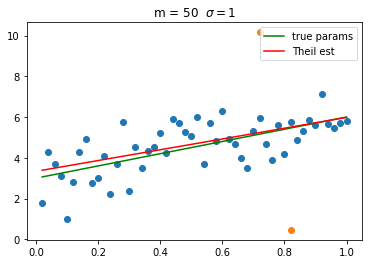

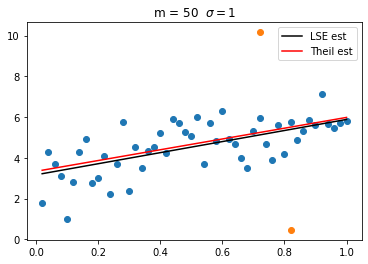

In [9]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + stat.norm(0, 1).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    ys_corrupt[(t + 5) % m0] = a * xs[(t + 5) % m0] + b - 5
    
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys_corrupt)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys_corrupt, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ', sum([(ys[i] - LSEa * xs[i] - LSEb) ** 2 for i in range(1, m0)]) / m0)
    print('sigma Theil = RSS / m = ', sum([(ys[i] - Theila * xs[i] - Theilb) ** 2 for i in range(1, m0)]) / m0)
    
    plt.scatter(xs, ys)
    plt.scatter([xs[t], xs[(t + 5) % m0]], [ys_corrupt[t], ys_corrupt[(t + 5) % m0]])
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.scatter([xs[t], xs[(t + 5) % m0]], [ys_corrupt[t], ys_corrupt[(t + 5) % m0]])
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

m = 10
a LSE = 0.07482337048105837 a Theil = 2.5967569861766093
b LSE = 4.603643399134172 b Theil = 2.9961914868454667
sigma LSE = RSS / m =  0.7017063311869679
sigma Theil = RSS / m =  0.10495347149365494


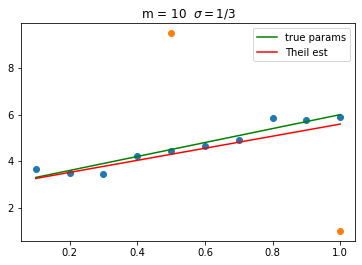

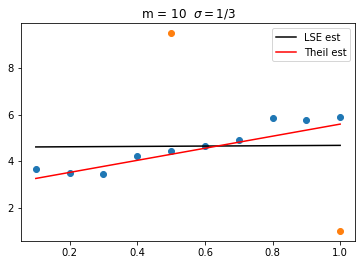

m = 20
a LSE = 2.6359405036614607 a Theil = 3.190713157003697
b LSE = 3.2297983533056613 b Theil = 2.5969844483752094
sigma LSE = RSS / m =  0.19721775584318796
sigma Theil = RSS / m =  0.288381346999797


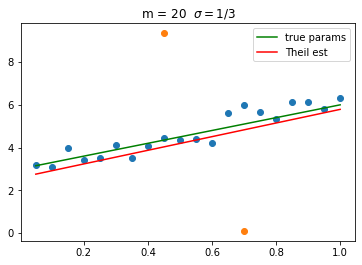

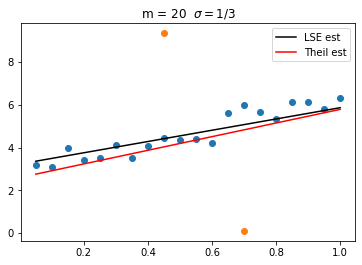

m = 50
a LSE = 2.7569636476167383 a Theil = 2.847094316841373
b LSE = 3.0460376095496544 b Theil = 3.1095774018724383
sigma LSE = RSS / m =  0.13850526552380535
sigma Theil = RSS / m =  0.147983685375951


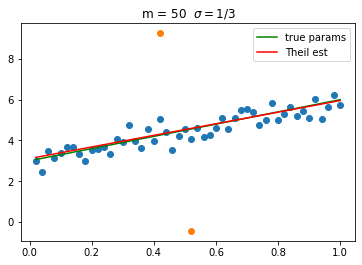

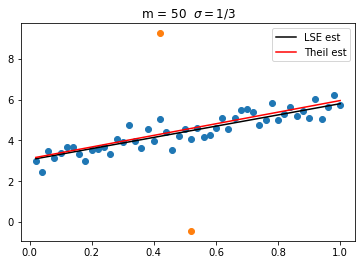

In [10]:
a = 3; b = 3;

t_prec = stat.randint(0, 10).rvs()
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1 + 1 / m0, step = 1 / m0)
    ys = np.array([a * elem + b + stat.norm(0, a/9).rvs() for elem in xs])
    ys_corrupt = ys.copy()
    
    t = t_prec * m0 // 10 
    ys_corrupt[t] = a * xs[t] + b + 5
    ys_corrupt[(t + 5) % m0] = a * xs[(t + 5) % m0] + b - 5
    
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys_corrupt)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys_corrupt, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ', sum([(ys[i] - LSEa * xs[i] - LSEb) ** 2 for i in range(1, m0)]) / m0)
    print('sigma Theil = RSS / m = ', sum([(ys[i] - Theila * xs[i] - Theilb) ** 2 for i in range(1, m0)]) / m0)
    
    plt.scatter(xs, ys)
    plt.scatter([xs[t], xs[(t + 5) % m0]], [ys_corrupt[t], ys_corrupt[(t + 5) % m0]])
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1/3$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.scatter([xs[t], xs[(t + 5) % m0]], [ys_corrupt[t], ys_corrupt[(t + 5) % m0]])
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1/3$')
    plt.show()